# Support Vector Machines - SVM
## Laboratorio 3

## [Fraude en el Vino](https://en.wikipedia.org/wiki/Wine_fraud)

El fraude en el vino se relaciona a los aspectos comerciales del vino.  El tipo más prevalente de fraude es aquel en el cual los vinos son adulterados, generalmente con la adición de productos más baratos (e.g. jugos) y, a veces, con químicos dañinos y endulcorantes (para compensar el color o sabor).

La falsificación y la re-etiquetación de vinos inferiores y más baratos haciéndolos parecer marcas más caras es otro tipo común de fraude con vino.

<img src="wine.jpg">

## Objetivos del Laboratorio

Una compañía distribuidora, que recientemente fue víctima de fraude, ha completado una auditoría de varias muestras de vino a través del uso de análisis químico.  La compañía se especializa en la exportación de vinos de una calidad extremadamente alta y muy valiosos.  El fraude fue cometido por un proveedor que intentó pasar vinos baratos, de calidad inferior, como vinos de más alta gama.  La compañía distribuidora los ha contratado a Ustedes para intentar crear un modelo de aprendizaje de máquina (ML) que pueda ayudar a detectar muestras de vino de calidad baja ("fraude").  Quieren saber si siquiera es posible detectar tal diferencia.  


Fuente de datos: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**La meta general es utilizar el conjunto de datos adjunto para desarrollar un modelo que intenta predecir si un vino es legítimo "Legit" o fraudulento "Fraud" basado en varias características químicas.**

---
---

**Rubrica**

**(50 puntos) Análisis Exploratorio:**
* Identifica el tipo de archivo .data y la forma de leerlo [1]
* Estudia las variables cuantitativas mediante técnicas de estadística descriptiva [1]
* Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos [1]
* Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes. [1]
* Estudia las variables categóricas [1]
* Elabora gráficos de barra, tablas de frecuencia y de proporciones [1]
* Elabora gráficos adecuados según el tipo de dato que representan [1]
* Explica muy bien todos los procedimientos y los hallazgos que va haciendo. [1/2]
* Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar modelos [1]

**(36 puntos) Clasificación**
* Realiza varios modelos de Clasificación, analiza los resultados para identificar el de mejor rendimiento [0]
        
**(14 puntos) Hallazgos y conclusiones.**
* Hace la recomendación correcta para la Compañía Distribuidora [0]

In [36]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

**NOTA:  Al usar SVC, anteriormente hemos dejado el modelo en blanco, (e.g. sin parámeteros).  Sin embargo, en estos datos las clases no están balanceadas.  Para intentar remediar este problema, podemos ajustar automáticamente los pesos de forma inversamente proporcional a las frecuencias de las clases en los datos con una llamada en la invocación de SVC().  Ver la [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) en-línea y averiguen cuál es el argumento\parámetro.**

* Identifica el tipo de archivo .data y la forma de leerlo [1]

In [37]:
data = pd.read_csv('wine_fraud.csv')

In [38]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [39]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,Legit,white


In [40]:
# LA CALIDAD, 1 SI ES LEGITIMO, 0 SI ES FRAUDULENTO Y CONVERTIR A NUMERICA
data['quality'] = data['quality'].apply(lambda x: 1 if x == 'Legit' else 0)
data['quality'] = pd.to_numeric(data['quality'], errors='coerce')
# LA CALIDAD, 1 SI ES VINO BLANCO, 0 SI ES VINO ROJO Y CONVERTIR A NUMERICA
data['type'] = data['type'].apply(lambda x: 1 if x == 'white' else 0)
data['type'] = pd.to_numeric(data['type'], errors='coerce')

In [41]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0


* Estudia las variables cuantitativas mediante técnicas de estadística descriptiva

In [42]:
quant_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
desc_stats = data[quant_vars].describe()
print(desc_stats)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

* Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos

El primer gráfico de dispersión muestra la relación entre alcohol y calidad. Parece que los vinos con mayor graduación alcohólica tienden a tener calificaciones de calidad más altas.

El segundo gráfico de dispersión muestra la relación entre la acidez volátil y el pH. Parece que existe una correlación negativa entre estas dos variables, lo que significa que los vinos con mayor acidez volátil tienden a tener niveles de pH más bajos.

El tercer gráfico de dispersión muestra la relación entre el dióxido de azufre total y el dióxido de azufre libre. Parece existir una relación lineal entre estas dos variables, lo que significa que a medida que aumenta una variable, la otra también tiende a aumentar.

Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator

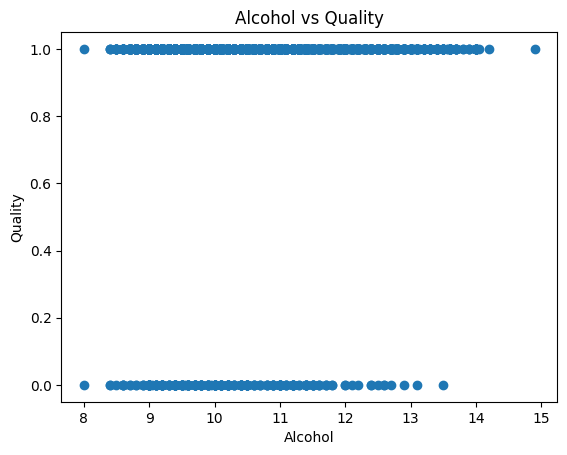

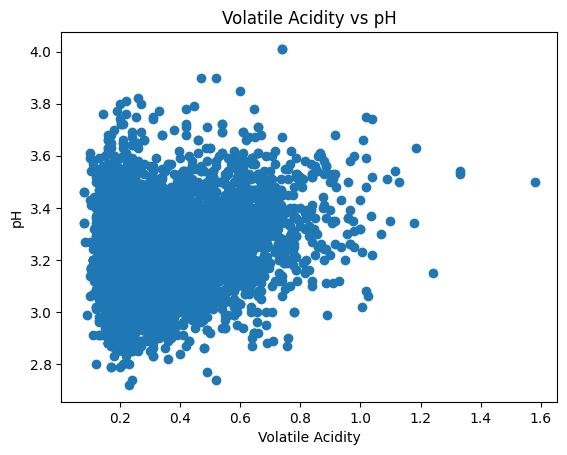

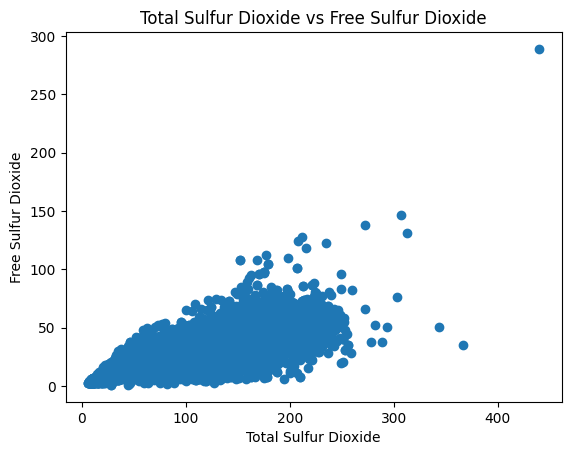

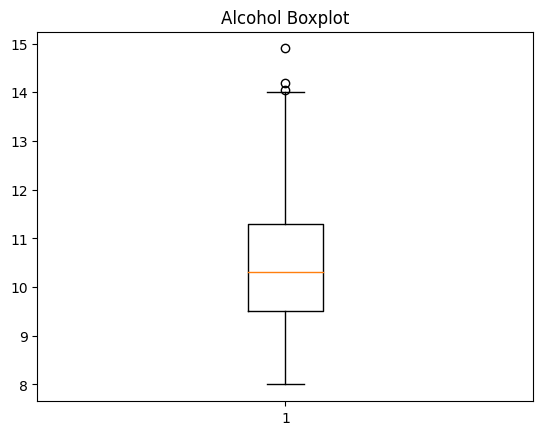

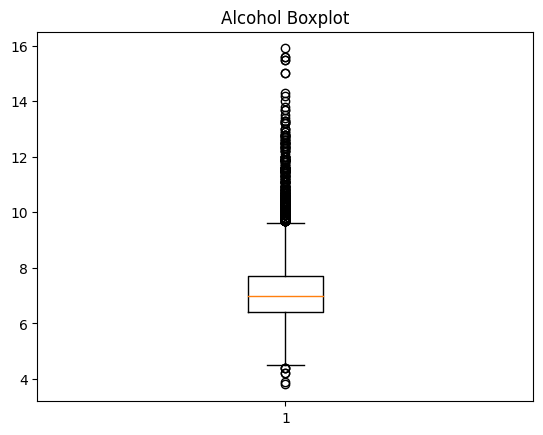

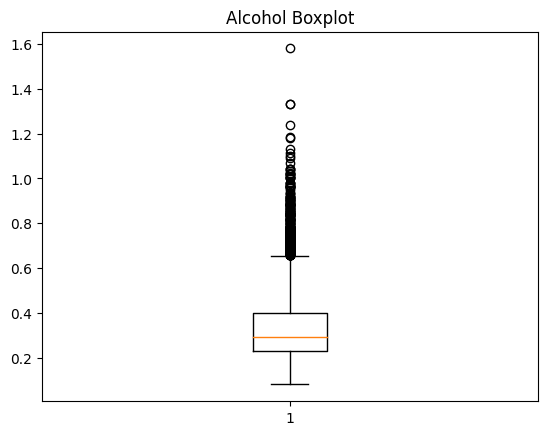

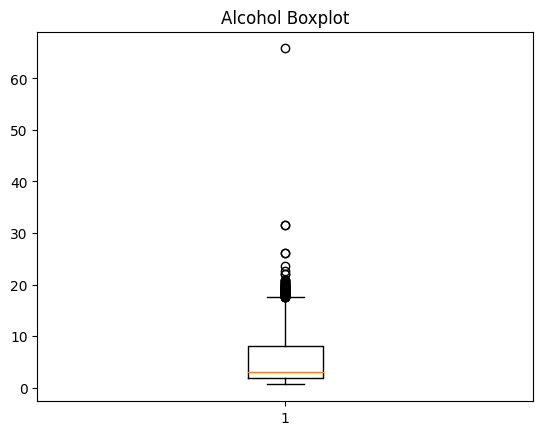

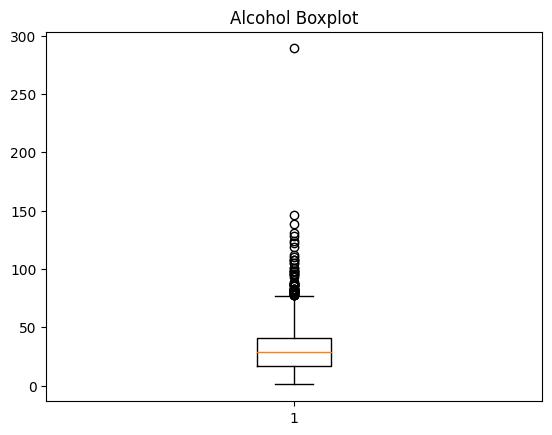

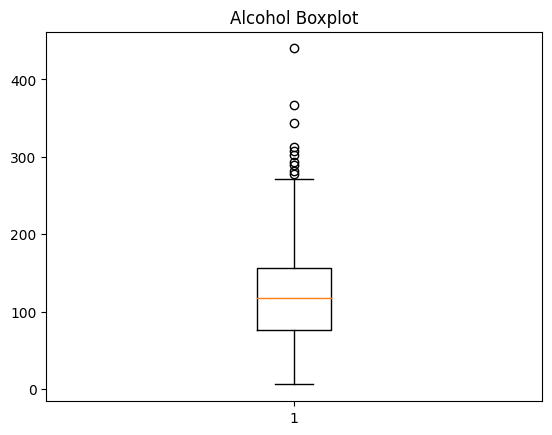

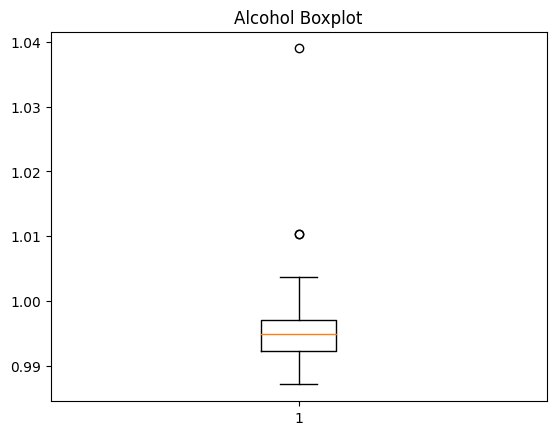

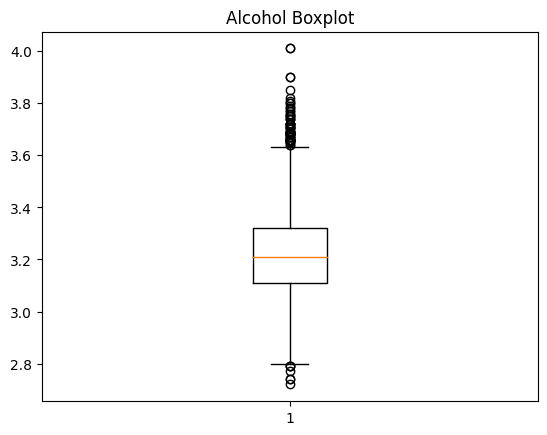

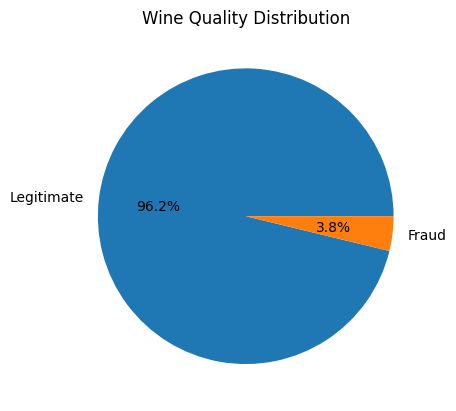

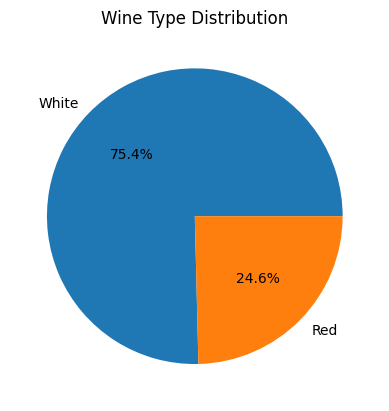

In [43]:
plt.scatter(data['alcohol'], data['quality'])
plt.title('Alcohol vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

plt.scatter(data['volatile acidity'], data['pH'])
plt.title('Volatile Acidity vs pH')
plt.xlabel('Volatile Acidity')
plt.ylabel('pH')
plt.show()

plt.scatter(data['total sulfur dioxide'], data['free sulfur dioxide'])
plt.title('Total Sulfur Dioxide vs Free Sulfur Dioxide')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Free Sulfur Dioxide')
plt.show()

plt.boxplot(data['alcohol'])
plt.title('Alcohol Boxplot')
plt.show()

plt.boxplot(data['fixed acidity'])
plt.title('Alcohol Boxplot')
plt.show()

plt.boxplot(data['volatile acidity'])
plt.title('Alcohol Boxplot')
plt.show()

plt.boxplot(data['residual sugar'])
plt.title('Alcohol Boxplot')
plt.show()

plt.boxplot(data['free sulfur dioxide'])
plt.title('Alcohol Boxplot')
plt.show()

plt.boxplot(data['total sulfur dioxide'])
plt.title('Alcohol Boxplot')
plt.show()

plt.boxplot(data['density'])
plt.title('Alcohol Boxplot')
plt.show()

plt.boxplot(data['pH'])
plt.title('Alcohol Boxplot')
plt.show()

type_counts = data['quality'].value_counts()
labels = ['Legitimate', 'Fraud']
plt.pie(type_counts, labels=labels, autopct='%1.1f%%')
plt.title('Wine Quality Distribution')
plt.show()

# create a pie chart of the type variable
type_counts = data['type'].value_counts()
labels = ['White', 'Red']
plt.pie(type_counts, labels=labels, autopct='%1.1f%%')
plt.title('Wine Type Distribution')
plt.show()

* Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


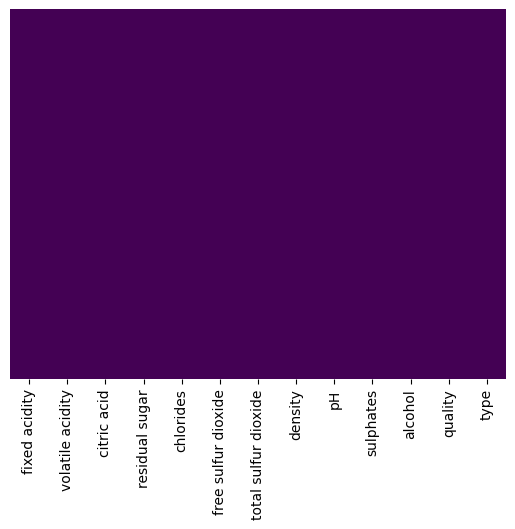

In [44]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
print(data.isnull().sum())

<AxesSubplot: >

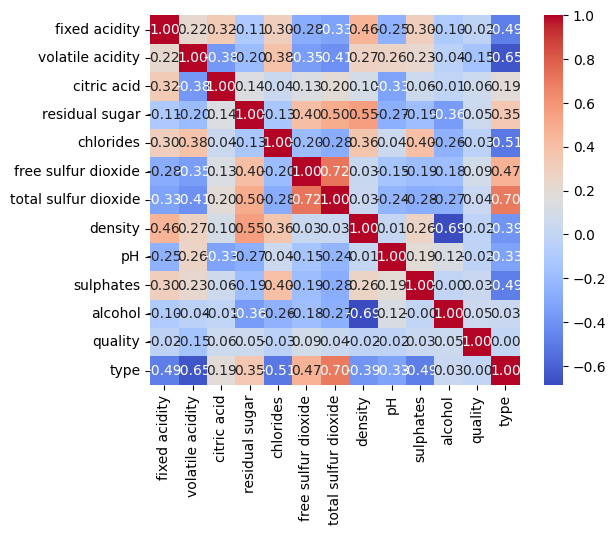

In [45]:
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)

* Estudia las variables categóricas

In [46]:
print("Frecuencia de valores en la variable 'quality':")
print(data['quality'].value_counts())

print("\nFrecuencia de valores en la variable 'type':")
print(data['type'].value_counts())

Frecuencia de valores en la variable 'quality':
1    6251
0     246
Name: quality, dtype: int64

Frecuencia de valores en la variable 'type':
1    4898
0    1599
Name: type, dtype: int64


- Aqui podemos ver como es que los datos de quiality se diferencian, recordemos que 

1 = legitimo = 6251

0 = ilegitimo = 246
- Tambien tenemos en ti los valores 

1 = vino blanco = 4898

0 = vino rojo = 1599

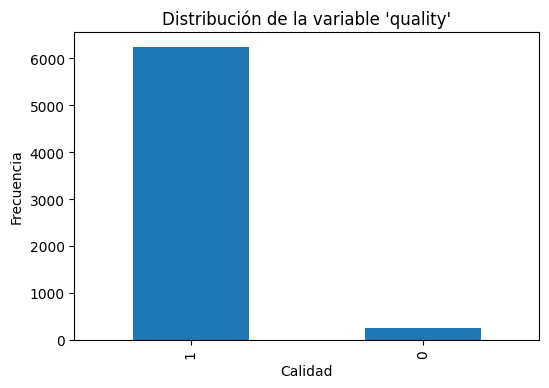

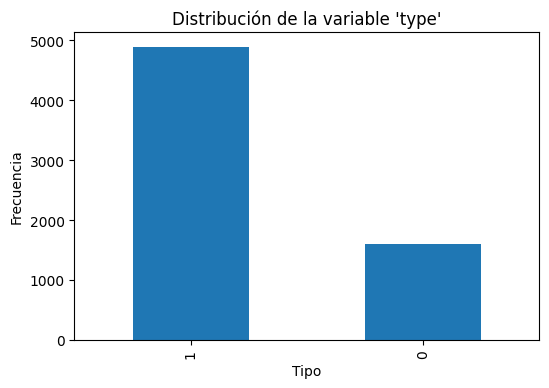

In [47]:
plt.figure(figsize=(6,4))
data['quality'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable \'quality\'')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para la variable 'type'
plt.figure(figsize=(6,4))
data['type'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable \'type\'')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.show()

* Elabora gráficos de barra, tablas de frecuencia y de proporciones

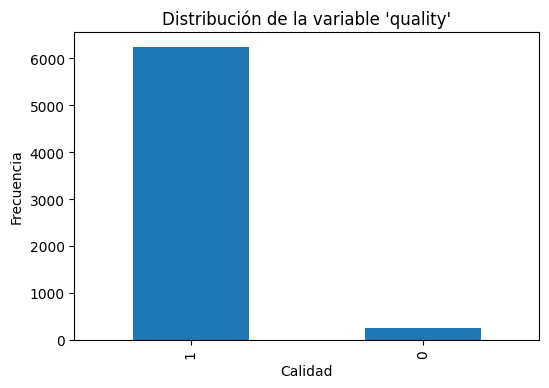

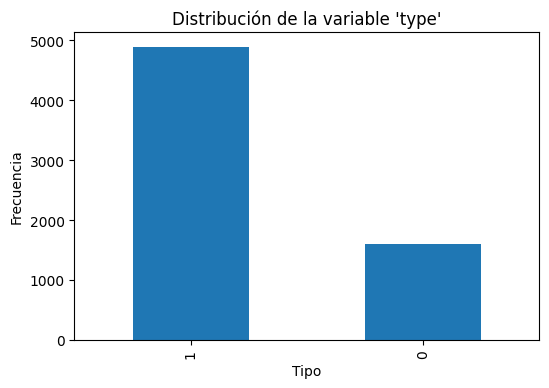

Frequency table of wine quality:
col_0    count
quality       
0          246
1         6251
Proportion table of wine quality:
col_0    proportion
quality            
0          0.037864
1          0.962136
Frequency table of wine type:
col_0  count
type        
0       1599
1       4898
Proportion table of wine type:
col_0  proportion
type             
0        0.246114
1        0.753886


In [48]:
plt.figure(figsize=(6,4))
data['quality'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable \'quality\'')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para la variable 'type'
plt.figure(figsize=(6,4))
data['type'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable \'type\'')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.show()

# Obtener la tabla de frecuencia de la variable 'quality'
quality_table = pd.crosstab(index=data['quality'], columns='count')

# Obtener la tabla de proporciones de la variable 'quality'
quality_prop = pd.crosstab(index=data['quality'], columns='proportion', normalize=True)

# Imprimir la tabla de frecuencia de la variable 'quality'
print('Frequency table of wine quality:')
print(quality_table)

# Imprimir la tabla de proporciones de la variable 'quality'
print('Proportion table of wine quality:')
print(quality_prop)

# Obtener la tabla de frecuencia de la variable 'type'
type_table = pd.crosstab(index=data['type'], columns='count')

# Obtener la tabla de proporciones de la variable 'type'
type_prop = pd.crosstab(index=data['type'], columns='proportion', normalize=True)

# Imprimir la tabla de frecuencia de la variable 'type'
print('Frequency table of wine type:')
print(type_table)

# Imprimir la tabla de proporciones de la variable 'type'
print('Proportion table of wine type:')
print(type_prop)

* Elabora gráficos adecuados según el tipo de dato que representan

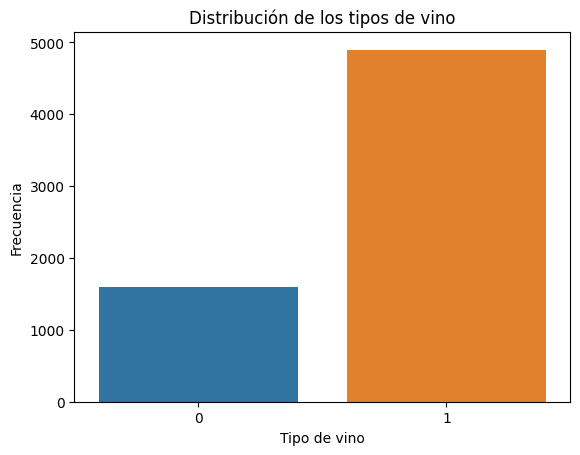

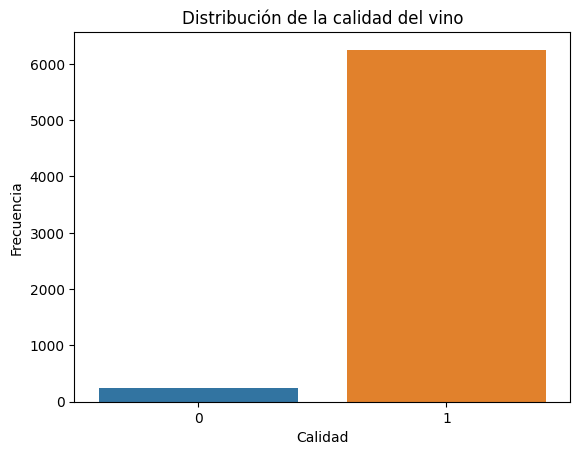

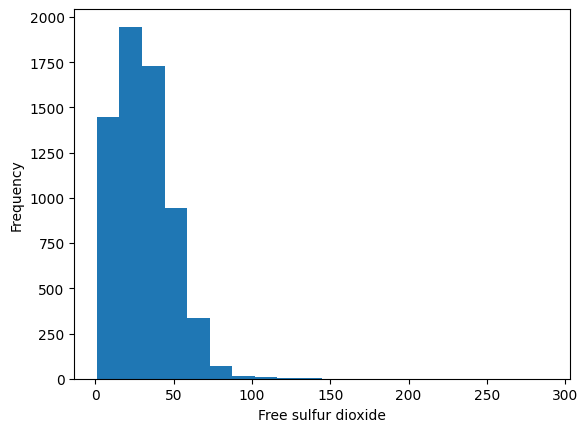

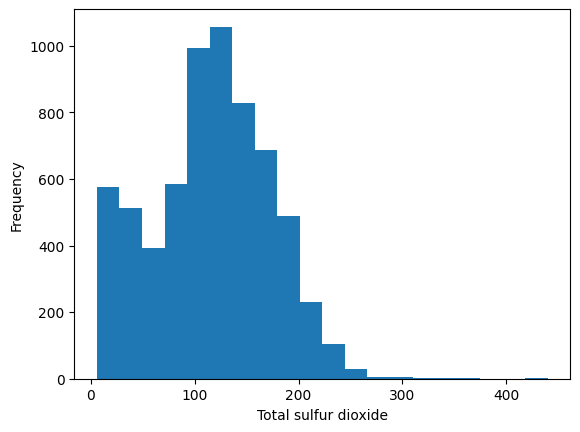

<AxesSubplot: xlabel='fixed acidity', ylabel='Count'>

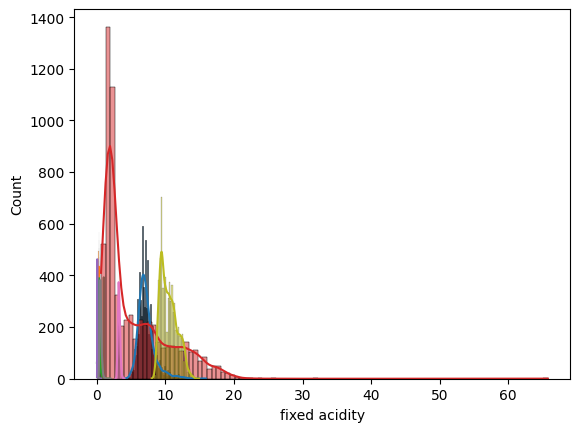

In [49]:
#VARIABLE CUALITATIVA NOMINAL
sns.countplot(x="type", data=data)
plt.title("Distribución de los tipos de vino")
plt.xlabel("Tipo de vino")
plt.ylabel("Frecuencia")
plt.show()


#VARIABLE CUALITATIVA ORDINAL
sns.countplot(x="quality", data=data)
plt.title("Distribución de la calidad del vino")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.show()

#VARIABLE CUANTITATIVA DISCRETA
plt.hist(data["free sulfur dioxide"], bins=20)
plt.xlabel("Free sulfur dioxide")
plt.ylabel("Frequency")
plt.show()

plt.hist(data["total sulfur dioxide"], bins=20)
plt.xlabel("Total sulfur dioxide")
plt.ylabel("Frequency")
plt.show()

#VARIABLE CUANTITATIVA CONTINUA
sns.histplot(x="fixed acidity", data=data, kde=True)
sns.histplot(x="volatile acidity", data=data, kde=True)
sns.histplot(x="citric acid", data=data, kde=True)
sns.histplot(x="residual sugar", data=data, kde=True)
sns.histplot(x="chlorides", data=data, kde=True)
sns.histplot(x="density", data=data, kde=True)
sns.histplot(x="pH", data=data, kde=True)
sns.histplot(x="sulphates", data=data, kde=True)
sns.histplot(x="alcohol", data=data, kde=True)

* Explica muy bien todos los procedimientos y los hallazgos que va haciendo.

Lo primero que podemos ver es la diferencia entre los tipos de vinos teniendo una mayor cantidad de vino blanco, ademas que tenemos una minoria en los datos de los valores ilegitimos.

Tambien podemos notar que los datos en el libre de dioxido de sulfuro, el cual es un preservante, se encuentra entre los valores de 0 y 50, por lo que no hay altas cantidades de preservante en el vino, asi que aunque deberia de ser libre aun lo encontramos en muy leves cantidades, mientras que el total del preservativo, podemos encontrar altas frecuencias sobre todo entre los 100 y los 200

1 = legitimo = 6251

0 = ilegitimo = 246
- Tambien tenemos en ti los valores 

1 = vino blanco = 4898

0 = vino rojo = 1599

* Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar modelos 

In [50]:
data.drop_duplicates(inplace=True)
print(data["quality"].value_counts())
data.head()

1    5084
0     236
Name: quality, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,0


# Clasificación

In [68]:
from sklearn.preprocessing import StandardScaler

y = data["quality"]
data.groupby('quality').count()
print(data["quality"].value_counts())
X = data.drop("quality", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)
normalizador = StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)
print(y_train.value_counts())
print(y_test.value_counts())


1    5084
0     236
Name: quality, dtype: int64
1    4072
0     184
Name: quality, dtype: int64
1    1012
0      52
Name: quality, dtype: int64


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.01, 0.1, 1], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'degree': [2, 3, 4],
              'kernel': ['linear', 'poly', 'rbf']} 
grid = GridSearchCV(SVC(class_weight = {0:20, 1:1}), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search


In [108]:
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END C=0.01, degree=2, gamma=1, kernel=linear;, score=0.813 total time=   0.4s
[CV 2/5] END C=0.01, degree=2, gamma=1, kernel=linear;, score=0.833 total time=   0.4s
[CV 3/5] END C=0.01, degree=2, gamma=1, kernel=linear;, score=0.817 total time=   0.5s
[CV 4/5] END C=0.01, degree=2, gamma=1, kernel=linear;, score=0.823 total time=   0.4s
[CV 5/5] END C=0.01, degree=2, gamma=1, kernel=linear;, score=0.828 total time=   0.4s
[CV 1/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.823 total time=   0.5s
[CV 2/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.853 total time=   0.5s
[CV 3/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.819 total time=   0.4s
[CV 4/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.796 total time=   0.4s
[CV 5/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.821 total time=   0.4s
[CV 1/5] END C=0.01, degree=2, gamma=1, kernel=rbf;, score=0.957 total time= 

In [109]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.95      1.00      0.97      1012

    accuracy                           0.95      1064
   macro avg       0.48      0.50      0.49      1064
weighted avg       0.90      0.95      0.93      1064



c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score
mat_conf = confusion_matrix(grid_predictions, y_test)
print(mat_conf)
accuracy_score(y_test, grid_predictions)

[[   0    0]
 [  52 1012]]


0.9511278195488722